In [3]:
import pandas as pd

path = r"C:\Users\venkatraman\Downloads\tn_total_crimes_2020_2022.csv"
df = pd.read_csv(path)
df.head()


,Districts,2020,2021,2022,Share in percentage (2022),Projected population (lakhs),Rate of Cognizable crime (IPC+SLL)
0,Ariyalur,12129,8752,4326,0.9,8.0,539.0
1,Chennai,168450,115247,39138,8.3,60.4,648.3
2,Coimbatore,33399,22300,15039,3.2,25.6,587.6
3,Coimbatore City,24044,13963,9250,2.0,11.2,828.0
4,Cuddalore,53052,32623,26361,5.6,27.7,951.4


In [5]:
df.columns.tolist()



['Districts',
 '2020',
 '2021',
 '2022',
 'Share in percentage (2022)',
 'Projected population (lakhs)',
 'Rate of Cognizable crime (IPC+SLL)']

In [6]:
df.describe()


,2022,Share in percentage (2022),Projected population (lakhs),Rate of Cognizable crime (IPC+SLL)
count,50.00000,50.000000,50.000000,50.000000
mean,18938.24000,4.002000,30.682000,629.856000
std,65907.04489,13.921111,106.745763,429.492215
min,3.00000,0.000000,0.000000,0.000000
25%,6613.00000,1.400000,9.175000,460.325000
50%,9236.00000,1.950000,15.000000,537.900000
75%,11419.00000,2.400000,21.575000,681.750000
max,473456.00000,100.000000,767.100000,2450.000000


In [7]:
print("Column names:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()
print("\nData types:")
df.info()
print("\nMissing values:")
df.isnull().sum()


Column names: ['Districts', '2020', '2021', '2022', 'Share in percentage (2022)', 'Projected population (lakhs)', 'Rate of Cognizable crime (IPC+SLL)']

First 5 rows:

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Districts                           50 non-null     object 
 1   2020                                50 non-null     object 
 2   2021                                50 non-null     object 
 3   2022                                50 non-null     int64  
 4   Share in percentage (2022)          50 non-null     float64
 5   Projected population (lakhs)        50 non-null     float64
 6   Rate of Cognizable crime (IPC+SLL)  50 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ KB

Missing values:


Districts                             0
2020                                  0
2021                                  0
2022                                  0
Share in percentage (2022)            0
Projected population (lakhs)          0
Rate of Cognizable crime (IPC+SLL)    0
dtype: int64

In [8]:
chennai_data= df[df["Districts"].str.contains('Chennai',case=False,na=False)]
print("Chennai data only")
chennai_data

Chennai data only


,Districts,2020,2021,2022,Share in percentage (2022),Projected population (lakhs),Rate of Cognizable crime (IPC+SLL)
1,Chennai,168450,115247,39138,8.3,60.4,648.3
20,Railway Chennai,1263,1291,2266,0.5,0.0,0.0


In [10]:
df['Crime_Rate_2022'] = df['2022'] / df['Projected population (lakhs)']
print("Crime rate per lakh population created!")
df[['Districts', '2022', 'Projected population (lakhs)', 'Crime_Rate_2022']].head()


Crime rate per lakh population created!


,Districts,2022,Projected population (lakhs),Crime_Rate_2022
0,Ariyalur,4326,8.0,540.750000
1,Chennai,39138,60.4,647.980132
2,Coimbatore,15039,25.6,587.460938
3,Coimbatore City,9250,11.2,825.892857
4,Cuddalore,26361,27.7,951.660650


In [11]:
bins = [0, 200, 400, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Crime_Category'] = pd.cut(df['Crime_Rate_2022'], bins=bins, labels=labels)
print(" Binning done!")
print(df[['Districts', 'Crime_Rate_2022', 'Crime_Category']].head())


 Binning done!
         Districts  Crime_Rate_2022 Crime_Category
0         Ariyalur       540.750000           High
1          Chennai       647.980132           High
2       Coimbatore       587.460938           High
3  Coimbatore City       825.892857           High
4        Cuddalore       951.660650           High


In [15]:

chennai = df[df['Districts'].str.contains('Chennai', case=False)].copy()
chennai = chennai.dropna(subset=['2020', '2021', '2022'])
print("✅ Clean Chennai data:")
print(chennai[['Districts', '2020', '2021', '2022', 'Crime_Category']])



✅ Clean Chennai data:
          Districts    2020    2021   2022 Crime_Category
1           Chennai  168450  115247  39138           High
20  Railway Chennai    1263    1291   2266           High


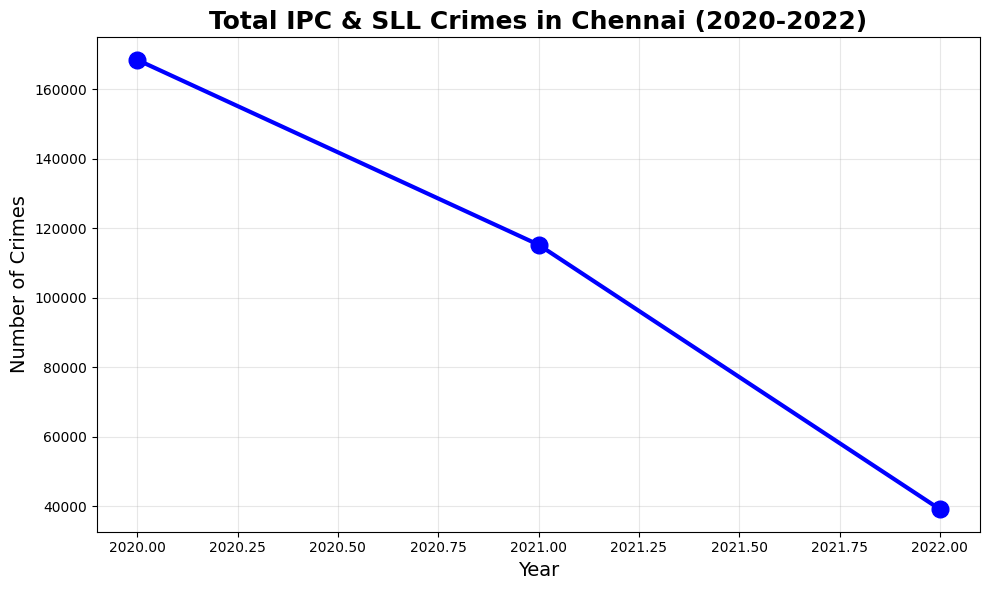

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.figure(figsize=(10, 6))
years = [2020, 2021, 2022]
crimes = [float(chennai['2020'].iloc[0]), float(chennai['2021'].iloc[0]), float(chennai['2022'].iloc[0])]
plt.plot(years, crimes, marker='o', linewidth=3, markersize=12, color='Blue')
plt.title('Total IPC & SLL Crimes in Chennai (2020-2022)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


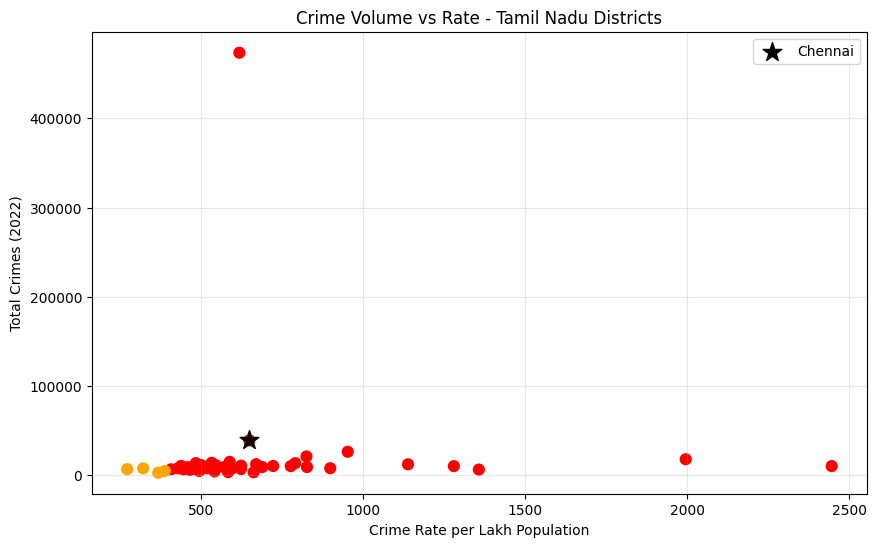

In [20]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Crime_Rate_2022'], df['2022'], c=df['Crime_Category'].map({'Low':'green','Medium':'orange','High':'red'}), s=60)
plt.scatter(chennai['Crime_Rate_2022'], chennai['2022'], color='black', s=200, marker='*', label='Chennai')
plt.xlabel('Crime Rate per Lakh Population')
plt.ylabel('Total Crimes (2022)')
plt.title('Crime Volume vs Rate - Tamil Nadu Districts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [24]:
print("=== CRIME ANALYSIS: TAMIL NADU 2022 ===\n")
print(f" Chennai Rank (by total crimes): {df['2022'].rank(ascending=False).where(df['Districts'].str.contains('Chennai')).iloc[0]}")
print(f"Chennai Crimes: 2020={chennai['2020'].iloc[0]}, 2021={chennai['2021'].iloc[0]}, 2022={chennai['2022'].iloc[0]}")
print(f"Crime Rate: {chennai['Crime_Rate_2022'].iloc[0]:.1f} per lakh population")
print(f"Category: {chennai['Crime_Category'].iloc[0]}")
print(f"\nCategory Breakdown:")
print(df['Crime_Category'].value_counts())
print(f"\n Top 5 (2022): {top5_with_chennai['Districts'].tolist()}")



=== CRIME ANALYSIS: TAMIL NADU 2022 ===

 Chennai Rank (by total crimes): nan
Chennai Crimes: 2020=168450, 2021=115247, 2022=39138
Crime Rate: 648.0 per lakh population
Category: High

Category Breakdown:
Crime_Category
High      46
Medium     4
Low        0
Name: count, dtype: int64

 Top 5 (2022): ['TOTAL DISTRICT(S)', 'Chennai', 'Cuddalore', 'Thanjavur', 'Trichy City', 'Coimbatore']
